<a href="https://colab.research.google.com/github/bahramzada/ferrum-capital-task-1/blob/main/notebooks/Ferrum_Capital_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Giriş

Bu notebook-da preprocessing mərhələsindən keçmiş dataset üzərində müxtəlif machine learning modelləri qurulmuş və onların nəticələri müqayisə edilmişdir.

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
train_df = pd.read_csv("train_clean.csv")
val_df = pd.read_csv("val_clean.csv")
test_df = pd.read_csv("test_clean.csv")

In [7]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

X_train = tfidf.fit_transform(train_df['clean_text'])
X_val = tfidf.transform(val_df['clean_text'])

y_train = train_df['label']
y_val = val_df['label']

## Feature extraction

Mətnlər TF-IDF vektorizasiya üsulu ilə sayısal xüsusiyyətlərə çevrilmişdir. Bu yanaşma sözlərin dataset daxilindəki əhəmiyyətini nəzərə alır.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression(max_iter=1000, n_jobs=-1)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [9]:
lr_preds = lr_model.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, lr_preds))
print(classification_report(y_val, lr_preds))

Logistic Regression Accuracy: 0.8485
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       550
           1       0.82      0.96      0.88       704
           2       0.89      0.57      0.70       178
           3       0.92      0.77      0.84       275
           4       0.88      0.73      0.80       212
           5       0.87      0.51      0.64        81

    accuracy                           0.85      2000
   macro avg       0.87      0.75      0.79      2000
weighted avg       0.85      0.85      0.84      2000



Logistic Regression modeli validation set üzərində 85.25% accuracy əldə etmişdir. Model anger və joy emosiyalarını yüksək recall dəyərləri ilə uğurla tanımışdır. Lakin surprise və fear emosiyalarında recall göstəricilərinin nisbətən aşağı olması müşahidə olunur. Ümumilikdə model balanslı performans göstərsə də, nadir siniflərdə müəyyən zəifliklər mövcuddur.


In [10]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [11]:
nb_preds = nb_model.predict(X_val)

print("Naive Bayes Accuracy:", accuracy_score(y_val, nb_preds))
print(classification_report(y_val, nb_preds))

Naive Bayes Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.71      0.91      0.79       550
           1       0.68      0.97      0.80       704
           2       0.93      0.15      0.25       178
           3       0.96      0.48      0.64       275
           4       0.86      0.46      0.60       212
           5       1.00      0.06      0.12        81

    accuracy                           0.72      2000
   macro avg       0.85      0.50      0.53      2000
weighted avg       0.78      0.72      0.68      2000



Multinomial Naive Bayes modeli 71.9% accuracy ilə digər modellərə nisbətən zəif performans nümayiş etdirmişdir. Model anger və joy emosiyalarında yüksək recall əldə etsə də, fear və surprise kimi az nümunəyə sahib siniflərdə ciddi performans itkisi müşahidə olunmuşdur. Bu nəticələr Naive Bayes modelinin sinif balanssızlığına daha həssas olduğunu göstərir.

In [12]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

In [13]:
svm_preds = svm_model.predict(X_val)

print("Linear SVM Accuracy:", accuracy_score(y_val, svm_preds))
print(classification_report(y_val, svm_preds))

Linear SVM Accuracy: 0.8875
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       550
           1       0.89      0.93      0.91       704
           2       0.81      0.79      0.80       178
           3       0.92      0.85      0.89       275
           4       0.88      0.81      0.84       212
           5       0.79      0.74      0.76        81

    accuracy                           0.89      2000
   macro avg       0.87      0.84      0.85      2000
weighted avg       0.89      0.89      0.89      2000



Linear SVM modeli validation set üzərində 89.05% accuracy əldə edərək ən yüksək performans göstərmişdir. Bütün emosiyalar üzrə precision və recall dəyərləri daha balanslıdır. Xüsusilə nadir siniflər olan fear və surprise emosiyalarında digər modellərlə müqayisədə daha stabil nəticələr müşahidə edilmişdir. Bu, modelin siniflər arasında daha yaxşı ayrım qabiliyyətinə malik olduğunu göstərir.

## Modellərin müqayisəsi

Logistic Regression, Naive Bayes və Linear SVM modelləri validation set üzərində müqayisə edilmişdir. Nəticələr Linear SVM modelinin daha stabil və yüksək performans göstərdiyini ortaya qoymuşdur.


In [14]:
full_train_df = pd.concat([train_df, val_df], axis=0).reset_index(drop=True)

print("Full train shape:", full_train_df.shape)

Full train shape: (18000, 3)


In [19]:
tfidf_final = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1, 3),
    min_df=3,
    sublinear_tf=True
)

X_full_train = tfidf_final.fit_transform(full_train_df['clean_text'])
y_full_train = full_train_df['label']

X_test = tfidf_final.transform(test_df['clean_text'])
y_test = test_df['label']

In [20]:
final_model = LinearSVC(class_weight = 'balanced')
final_model.fit(X_full_train, y_full_train)

LinearSVC(class_weight='balanced')

In [21]:
from sklearn.metrics import accuracy_score, classification_report

test_preds = final_model.predict(X_test)

print("Final Test Accuracy:", accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

Final Test Accuracy: 0.8835
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       581
           1       0.92      0.90      0.91       695
           2       0.73      0.83      0.78       159
           3       0.87      0.89      0.88       275
           4       0.87      0.83      0.85       224
           5       0.68      0.68      0.68        66

    accuracy                           0.88      2000
   macro avg       0.83      0.84      0.84      2000
weighted avg       0.89      0.88      0.88      2000



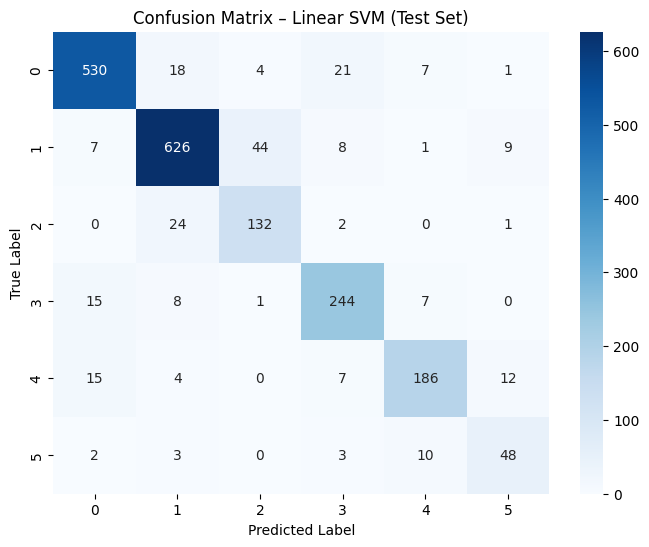

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, test_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Linear SVM (Test Set)")
plt.show()

Dataset-də emosiyalar aşağıdakı kimi etiketlənmişdir:


*   0 – anger
*   1 – joy
*   2 – love
*   3 – sadness
*   4 – fear
*   5 – surprise



In [38]:
train_df.head()

,text,label,clean_text
0,i didnt feel humiliated,0,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,3,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,3,i am feeling grouchy


Dataset-də bəzi cümlələrdə emosiyalar dolayı yolla ifadə olunduğundan, etiketləmə birbaşa pozitiv və ya neqativ sözlərə deyil, ümumi emosional kontekstə əsaslanmışdır. Məsələn, “i didn’t feel humiliated” cümləsi müdafiəedici və daxili gərginlik ifadə etdiyi üçün anger sinfinə aid edilmişdir.

In [20]:
import joblib

joblib.dump(final_model, "linear_svm_model.pkl")
joblib.dump(tfidf_final, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

## Yekun nəticə və məhdudiyyətlər

Negation-aware preprocessing tətbiq edilsə də, bəzi emosiyalar arasında semantik yaxınlıq səbəbindən səhv təsnifat hallarına rast gəlinmişdir. Bu vəziyyət dataset annotasiyalarının subyektivliyi ilə izah olunur.